## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [52]:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, Eq, latex, pi, E, imageset, plot
from sympy.calculus.util import continuous_domain
import sympy
from IPython.display import Latex
# Продолжим использовать магию
%matplotlib inline

### Задание 1
Решить уравнение $6x^4 + 9x^3 - 99x^2 - 66x + 360 = 0$ с помощью solve и solveset.

In [ ]:
x, k, y = sympy.symbols("x k y")
eq = 6 * x**4 + 9 * x**3 - 99 * x**2 - 66 * x + 360
lst_solve = solve(eq)
lst_from_solveset = [*solveset(eq)]
display(Latex(f"Решение\ c\ помощью\ solve : {latex(lst_solve)}"))
print()
display(Latex(f"Решение\ c\ помощью\ solveset : {latex(lst_from_solveset)}"))

### Задание 2.
Найти только вещественные решения уравнения $12x^8 + 32x^6 + 21x^4 - 2x^2 - 3 = 0$.

In [ ]:
eq_2 = 12 * x**8 + 32 * x**6 + 21 * x**4 - 2 * x**2 - 3
lst_real_ans = [*solveset(eq, domain = S.Reals)]
display(Latex(f"Вещественные\ решения\ уравнения\ {latex(Eq(eq_2, 0))}\ : {latex(lst_real_ans)}"))

### Задание 3.
Решить уравнение $\log_2(\sin(x))=-1$.

In [ ]:
eq_3 = sympy.log(sympy.sin(x), 2) + 1
lst_ans_eq3 = solveset(eq_3)
display(Latex(f"Решения\ уравнения\ {latex(Eq(eq_3 - 1, -1))}\ : {latex(lst_ans_eq3)}"))

### Задание 4.
Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале  $(-5\pi/4, 11\pi/4)$.

In [ ]:
eq_4 = 2 * sympy.tan(x) ** 2 - 3 * sympy.tan(x) - 5
lst_ans_interval = Intersection(solveset(eq_4), Interval.open( -pi * S(5)/4, pi * S(11)/4))
display(Latex(f"Решения\ уравнения\ {latex(Eq(eq_4, 0))}\ : {latex(lst_ans_interval)}"))

### Задание 5.
Найти область определения функции $\sqrt{\sin^2 x - 1}$.

In [ ]:
func_1 = sympy.sqrt(sympy.sin(x) ** 2 - 1)
domain_not_inf = continuous_domain(func_1, x, domain = S.Reals)
inf_domain_lst = {imageset(k, num + 2 * pi * k, S.Integers) for num in domain_not_inf}
domain_inf = Union(*inf_domain_lst)
display(Latex(f"Область\ определения\ функции\ {latex(func_1)} : {latex(domain_inf)}"))

### Задание 6.
Найти решение уравнения $\frac{(x^3 + 5 x^2 - 3 x - 15)\ln(x^2 - 3)}{x^2 - 3 x + 2} = 0$. Выполнить проверку подстановкой subs.
#### Указание.
Решение нужно разбить на части. Нужно учесть область определения выражения в левой части уравнения.

In [ ]:
# Функция для проверки корректности найденных решений с помощью подстановки и проверка на вхождение в область определния.
def CheckSolutionSubs(func, param, var_num):
  cur_domain = continuous_domain(func, param, domain = S.Reals)
  eq_checked = sympy.simplify(func.subs({param : var_num}))
  if (eq_checked == 0) and (len(Intersection(cur_domain, {var_num})) > 0):
    display(Latex(f"{latex(var_num)}\ является\ решением\ уравнения"))
  else:
    display(Latex(f"{latex(var_num)}\ не\ является\ решением\ уравнения"))

eq = (x**3 + 5 * x **2 - 3 * x - 15) * sympy.log(x**2 - 3, E) / (x **2 - 3 * x + 2)
lst_ans = [*solveset(eq, domain = S.Reals)]


display(Latex(f"Проверка\ полученных\ решений\ для\ уравнения\ {latex(Eq(eq, 0))}\ подстановкой\ :"))
for i in range(len(lst_ans)):
  CheckSolutionSubs(eq, x, lst_ans[i])


### Индивидуальное задание.
Через все точки пересечения графиков функций $f(x)$ и $g(x)$ провести горизонтальные прямые. Изобразить на графике $f(x)$ зеленым цветом, $g(x)$ красным, горизонтальные линии черным.
Формулы для $f(x)$ и $g(x)$ включить в легенду.

Вариант №134

$\begin{matrix}
&f(x) = -x^{2} - 8 \\
&g(x) = -\frac{7x^{2}}{2} + \frac{5x}{2} - 3
\end{matrix}$

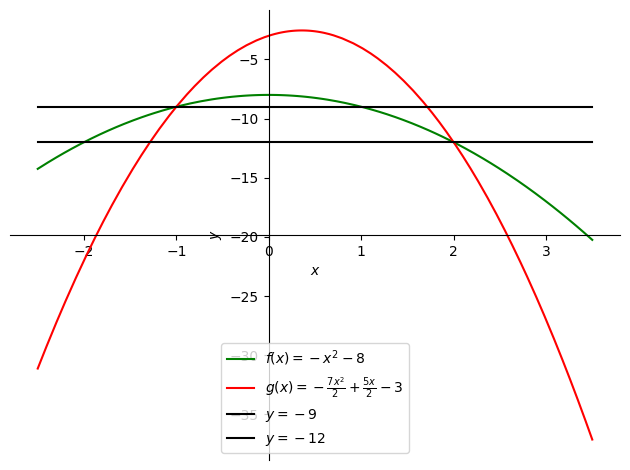

In [106]:
func_1 = -x**2 - 8
func_2 = - x**2 * S(7)/2 + x * S(5)/2 - 3
lst_x_val = [*solveset(func_1 - func_2, domain = S.Reals)]
lst_points = [(param, func_1.subs({x : param})) for param in lst_x_val]
x_lim = (x, min(lst_x_val) - 1.5, max(lst_x_val) + 1.5)

plt_all = plot(func_1, x_lim, xlabel = r"$x$", ylabel = r"$y$", line_color = "green",
               legend = True, label = r"$f(x) = -x^{2} - 8$", show = False)
plt_all.append(plot(func_2, x_lim, line_color = "red", label = r"$g(x) = -\frac{7x^{2}}{2} + \frac{5x}{2} - 3$", show = False)[0])

for i in range(len(lst_points)):
  plt_all.append(plot(lst_points[i][1], x_lim, line_color = "black", show = False, label = f"$y = {lst_points[i][1]}$", linestyle="--")[0])

plt_all.show()